In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.feature_selection import r_regression

base = "data/"

CLEAR = "CLEAR/"
WITH_COVER_WHITE = "WITH_COVER_WHITE/"
WITH_COVER_YELLOW = "WITH_COVER_YELLOW/"
WITH_COVER_BLUE = "WITH_COVER_BLUE/"
WITH_COVER_BLACK = "WITH_COVER_BLACK/"

UV = "UV/"
VIS = "VIS/"
IR = "IR/"
VIS_IR = "VIS_IR/"

covers = [
    {
        "path": CLEAR,
        "name": "Without sheet"    
    },
    {
        "path": WITH_COVER_WHITE,
        "name": "White transparent sheet"
    },
    {
        "path": WITH_COVER_YELLOW,
        "name": "Yellow transparent sheet"
    },
    {
        "path": WITH_COVER_BLUE,
        "name": "Blue semi-transparent sheet"
    },
    {
        "path": WITH_COVER_BLACK,
        "name": "Black seemingly not transparent sheet"
    }
]

types = [
    {
        "path": UV,
        "name": "UV"
    },
    {
        "path": VIS,
        "name": "VIS"
    },
    {
        "path": IR,
        "name": "IR"
    },
    # {
    #     "path": VIS_IR,
    #     "name": "VIS + IR"
    # }
]

channels = ["410nm", "435nm", "460nm", "485nm", "510nm", "535nm", "560nm","585nm","610nm","645nm","680nm","705nm","730nm","760nm","810nm","860nm","900nm","940nm"]
concentrations = [0, 2, 4, 6, 8, 12]

limits = {
    "UV": 400,
    "VIS": 800,
    "IR": 250,
    # "VIS + IR": 850
}


In [2]:
ranges = []

for cover in covers:
    for type in types:
        
        filepath = base + cover["path"] + type["path"]
        files = os.listdir(filepath)
        
        maxes = mins = None
        
        for file in files:
            data = np.loadtxt(filepath + file, delimiter="|").mean(axis=0)
            maxes = data if maxes is None else np.maximum(maxes, data)
            mins = data if mins is None else np.minimum(mins, data)
                
        diffs = maxes - mins
        ranges.append(np.max(diffs))
                
range_limit = np.ceil(np.max(ranges)) / 2
print(range_limit)

390.0


### The data in the following graphs have been measured this way:

- there were 4 types of measurements, where each had specific LEDs turned on and all channels were measured.

  - these types were: UV, VIS, IR, VIS + IR

- each measurement gathered 5 samples and calculated an average for each channel.
  

- First dataset was measured without any barrier between the sensor and glucose solution.
- The subsequent datasets were measured with colored plastic sheets between the sensor and glucose solution.
  - The sheets were: white transparent, yellow transparent, blue semi-transparent, black seemingly non-transparent.

## Without sheet

### LED on: UV

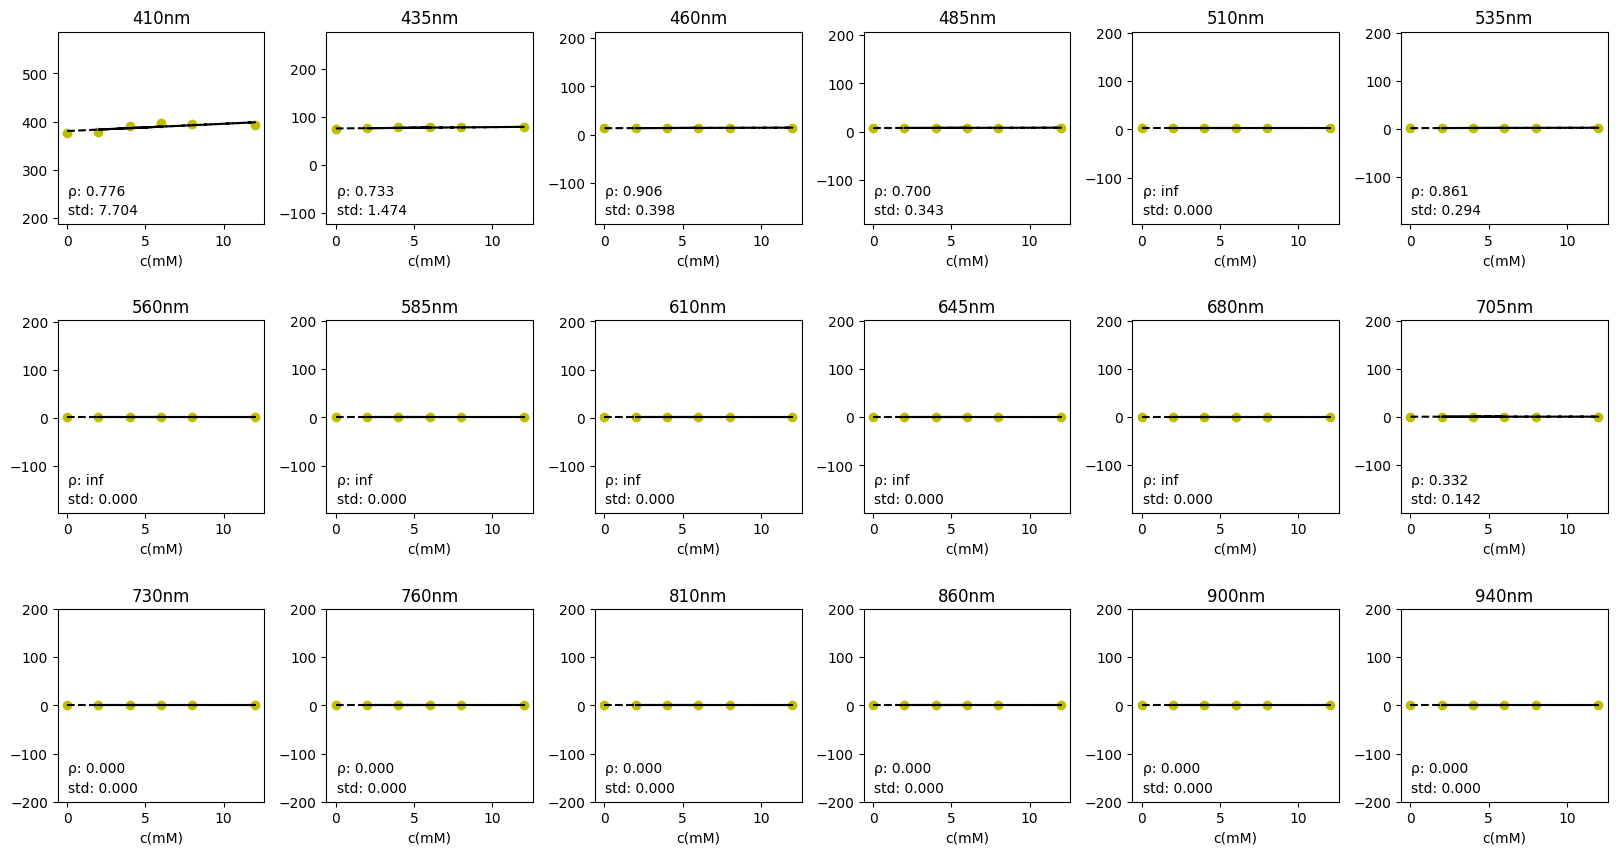

## Without sheet

### LED on: VIS

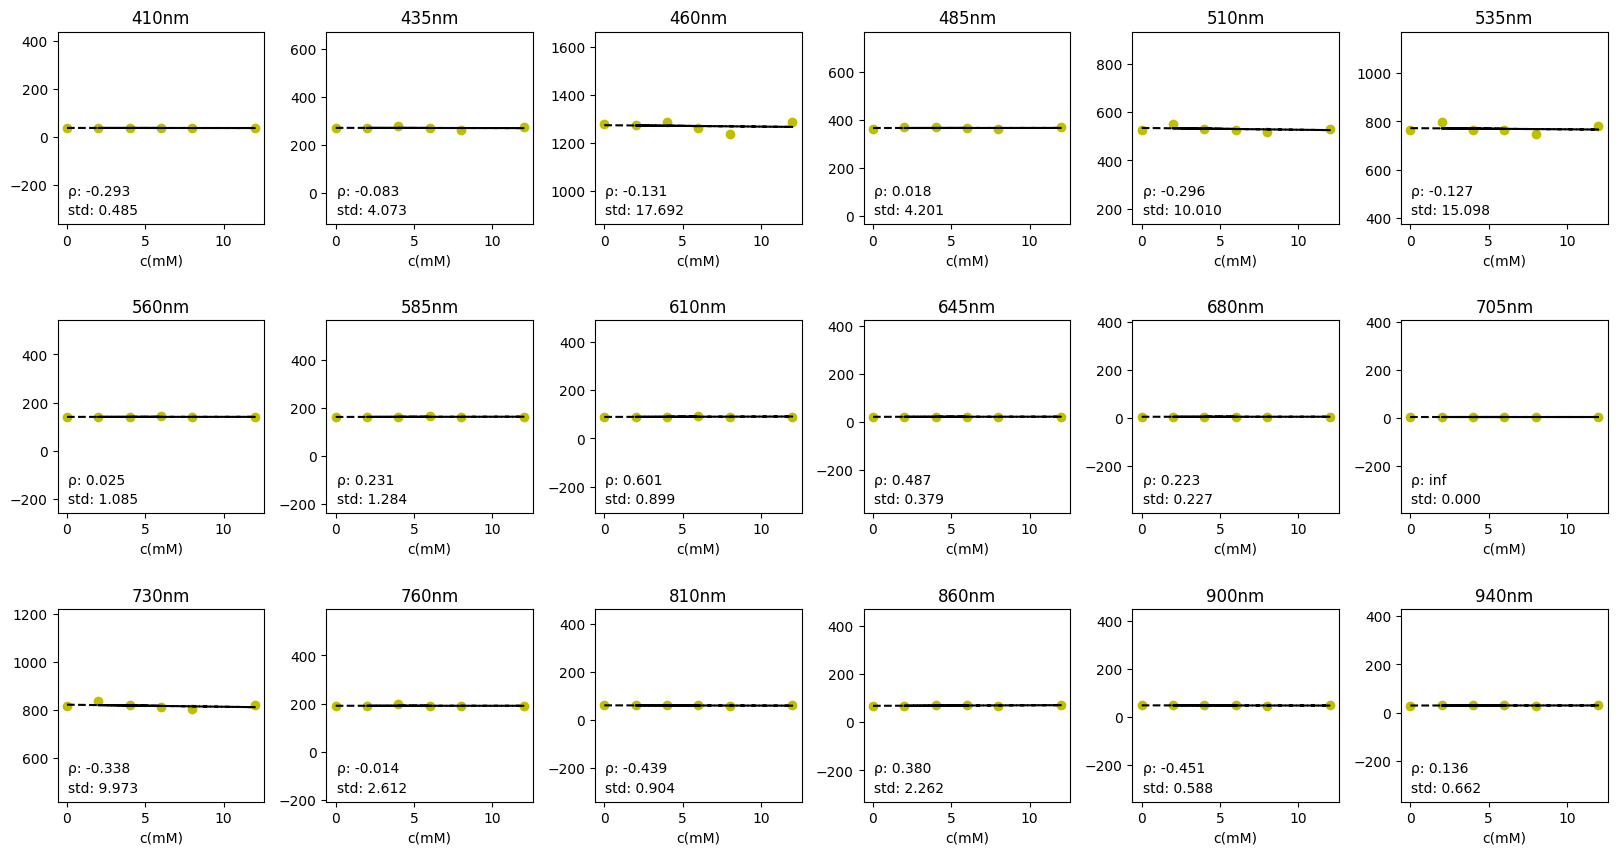

## Without sheet

### LED on: IR

/Users/denisbalogh/Desktop/Skola/Bakalarka/glucose-tracker/env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:331: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


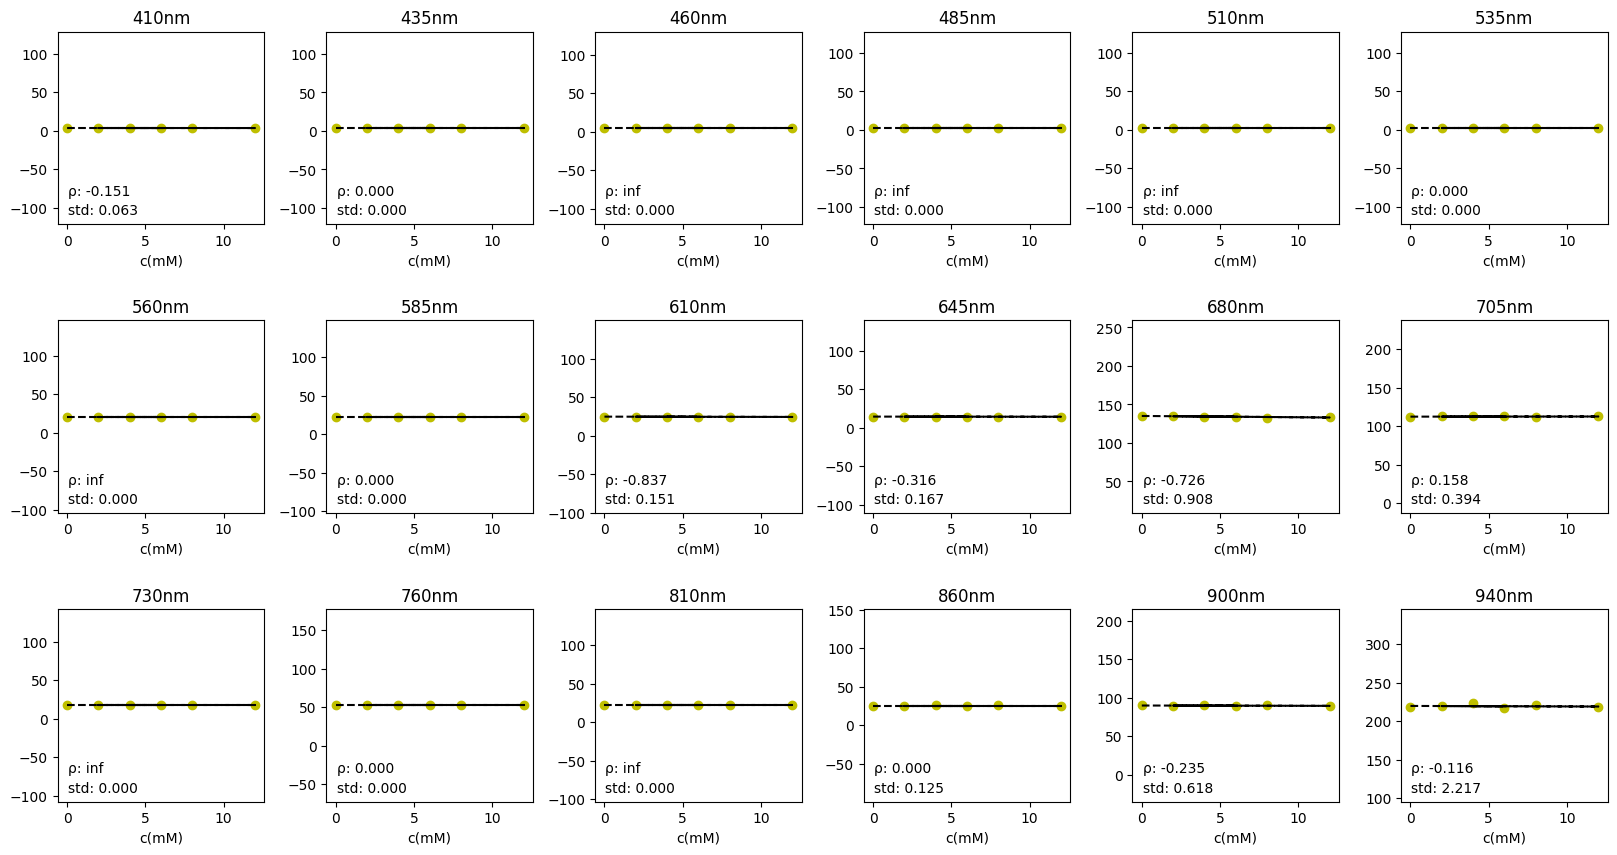

## White transparent sheet

### LED on: UV

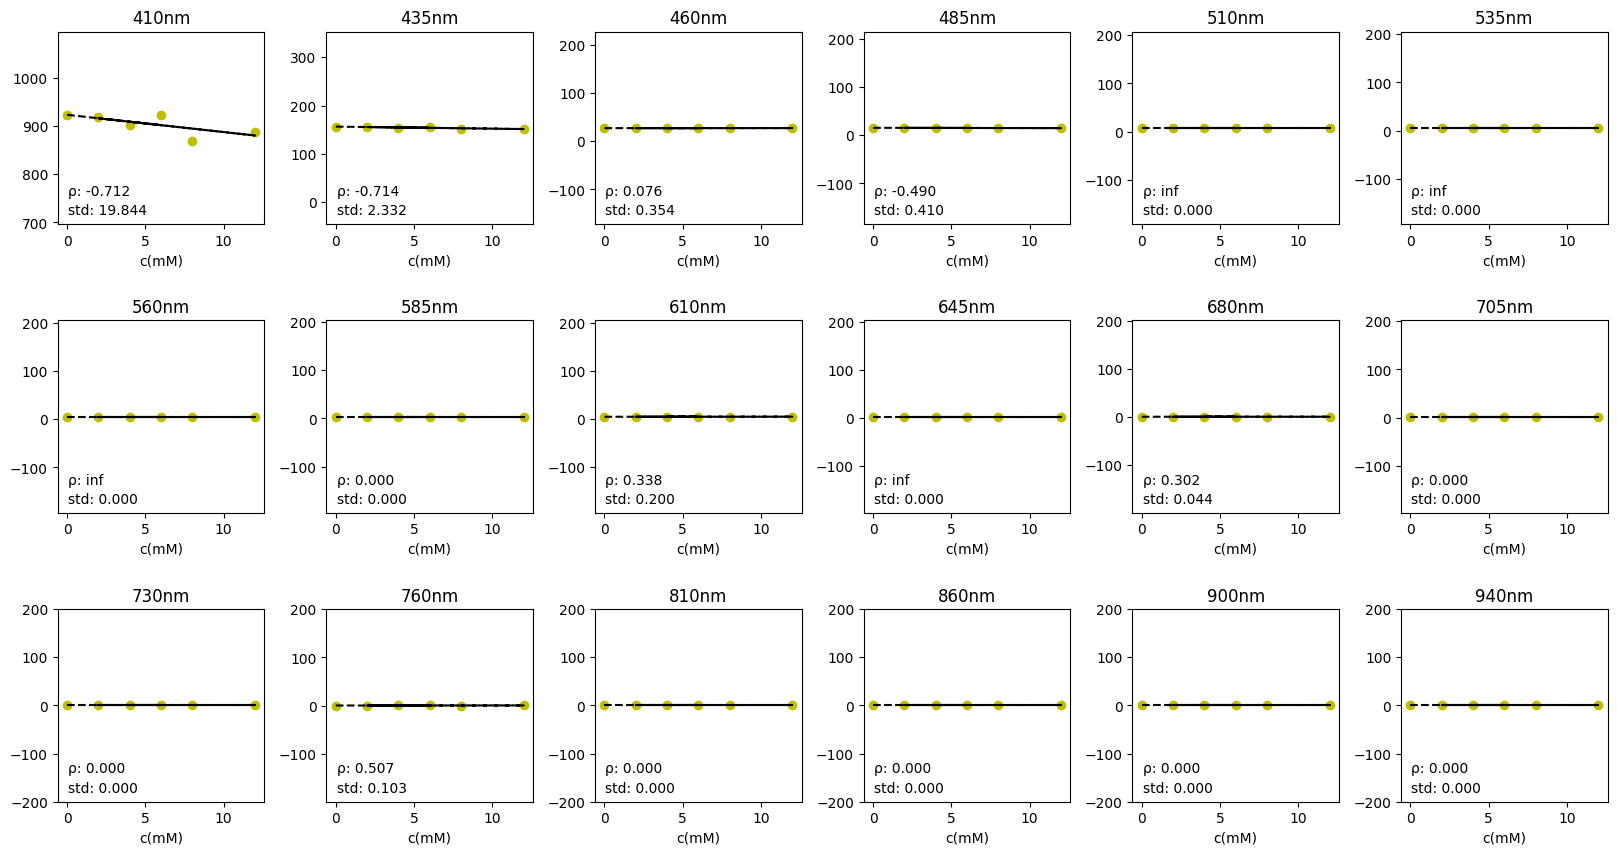

## White transparent sheet

### LED on: VIS

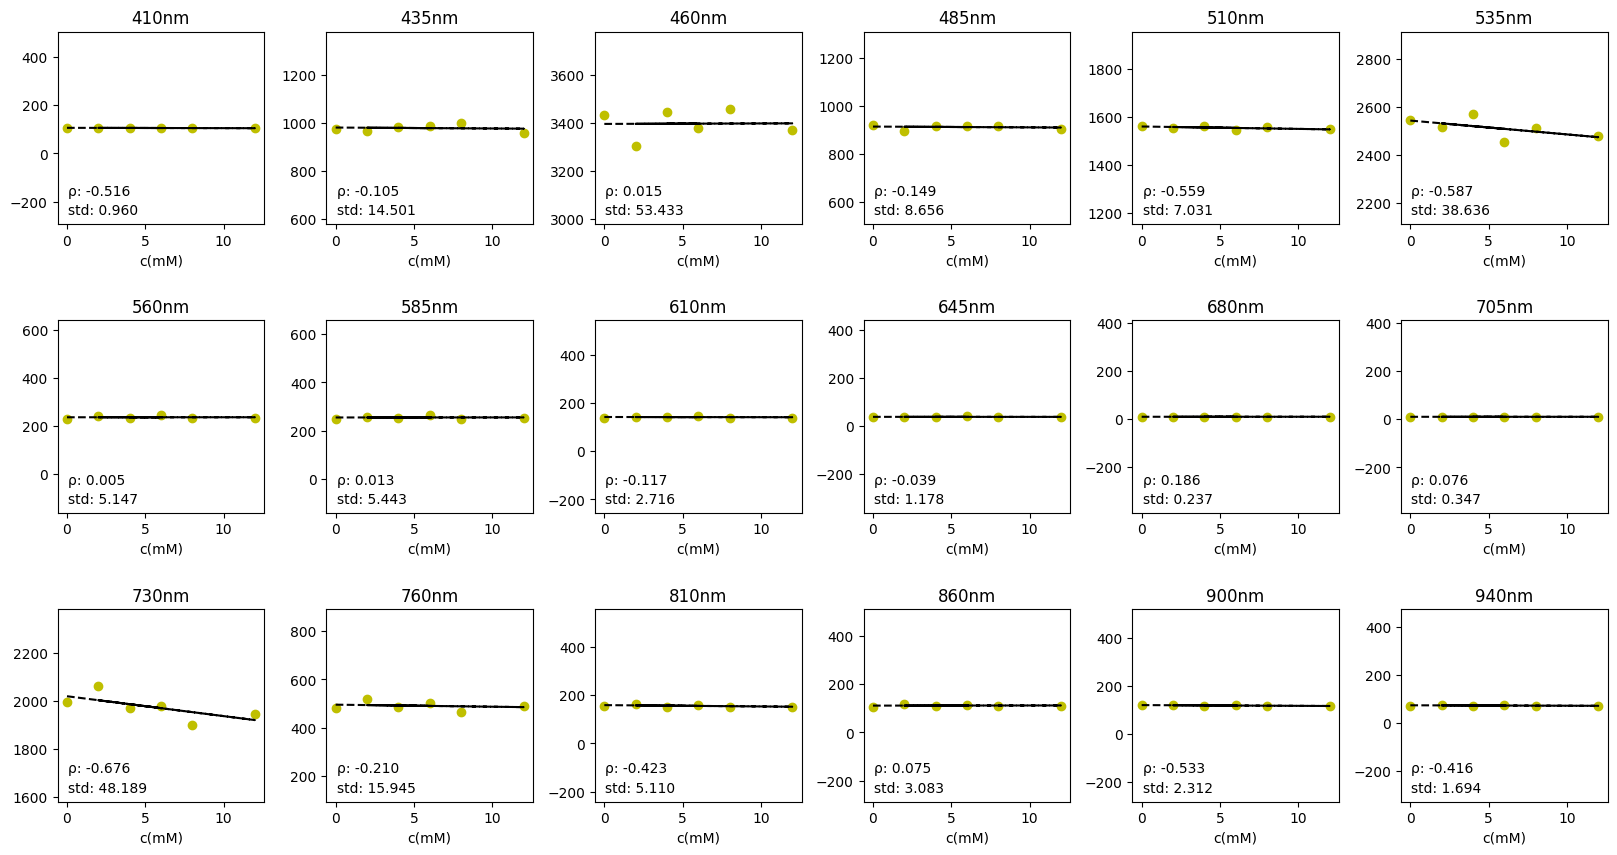

## White transparent sheet

### LED on: IR

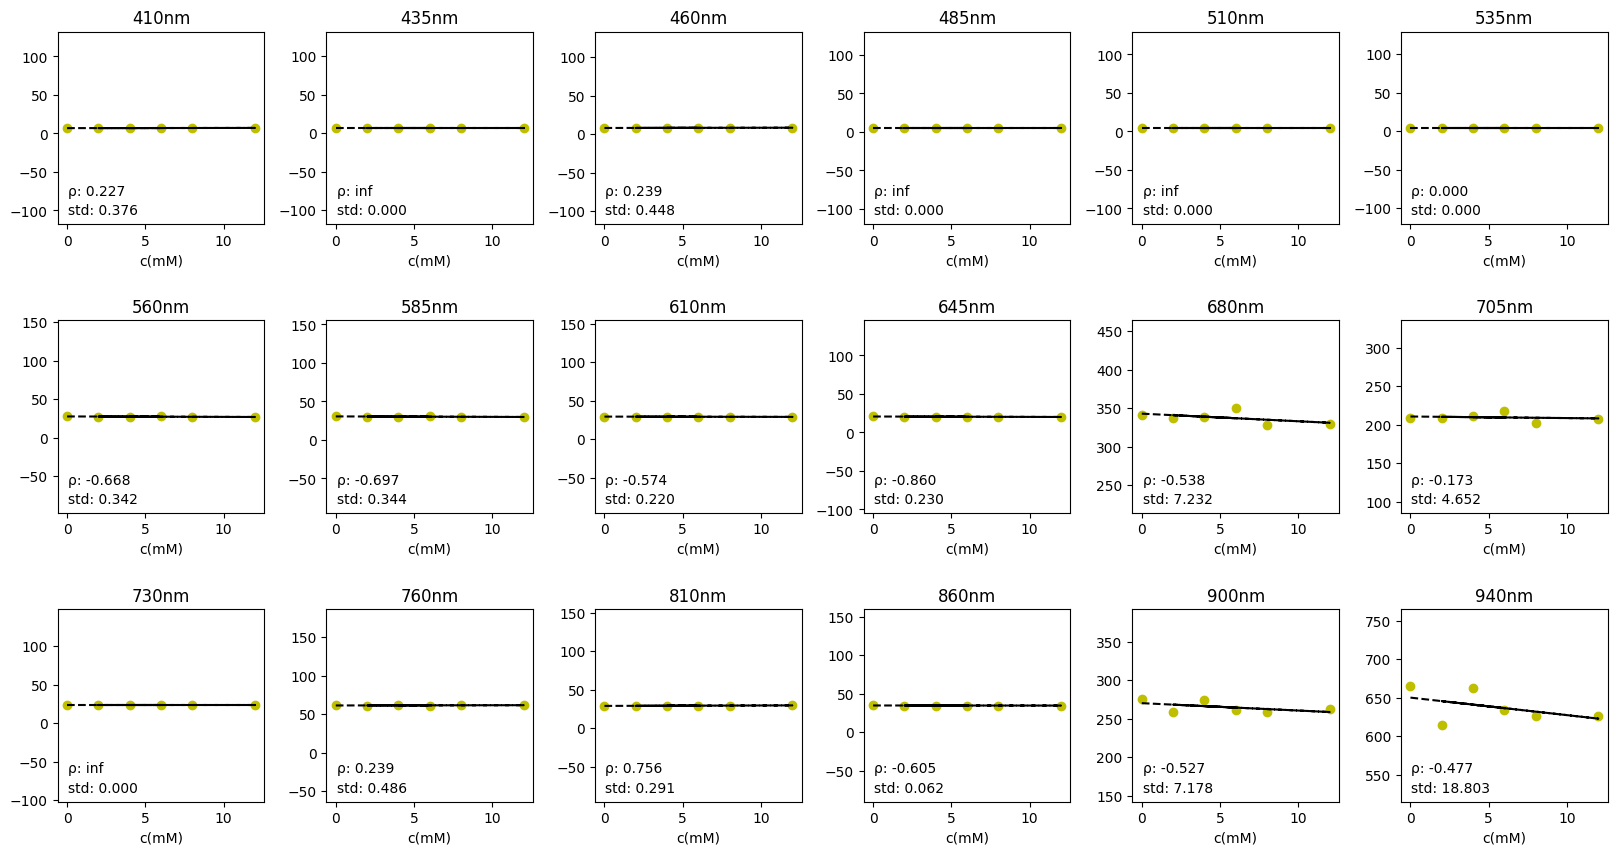

## Yellow transparent sheet

### LED on: UV

/Users/denisbalogh/Desktop/Skola/Bakalarka/glucose-tracker/env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:331: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)
/Users/denisbalogh/Desktop/Skola/Bakalarka/glucose-tracker/env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:331: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


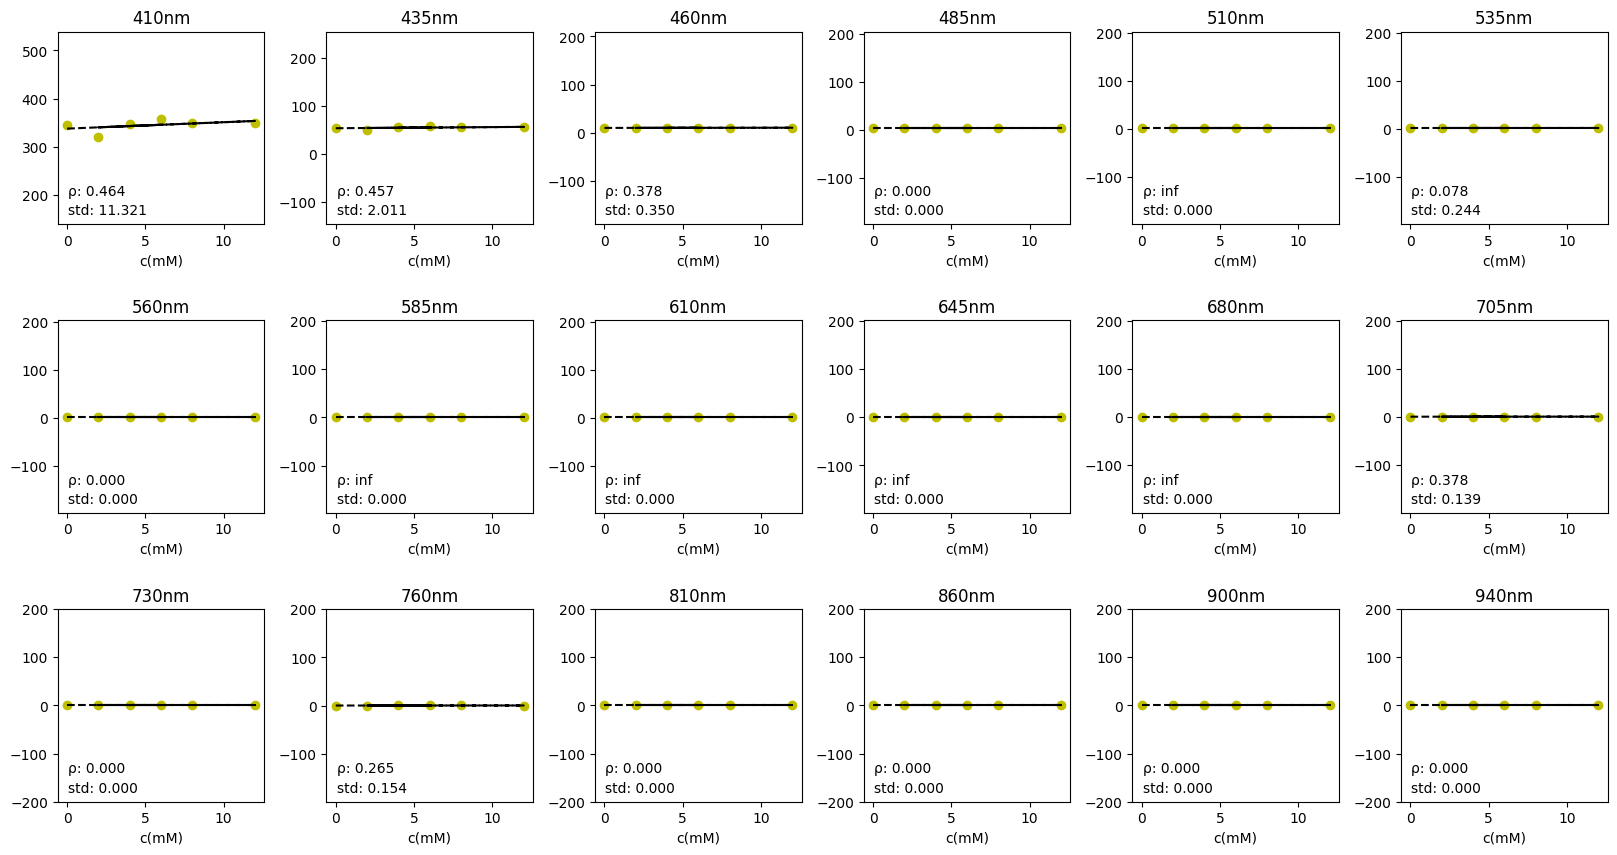

## Yellow transparent sheet

### LED on: VIS

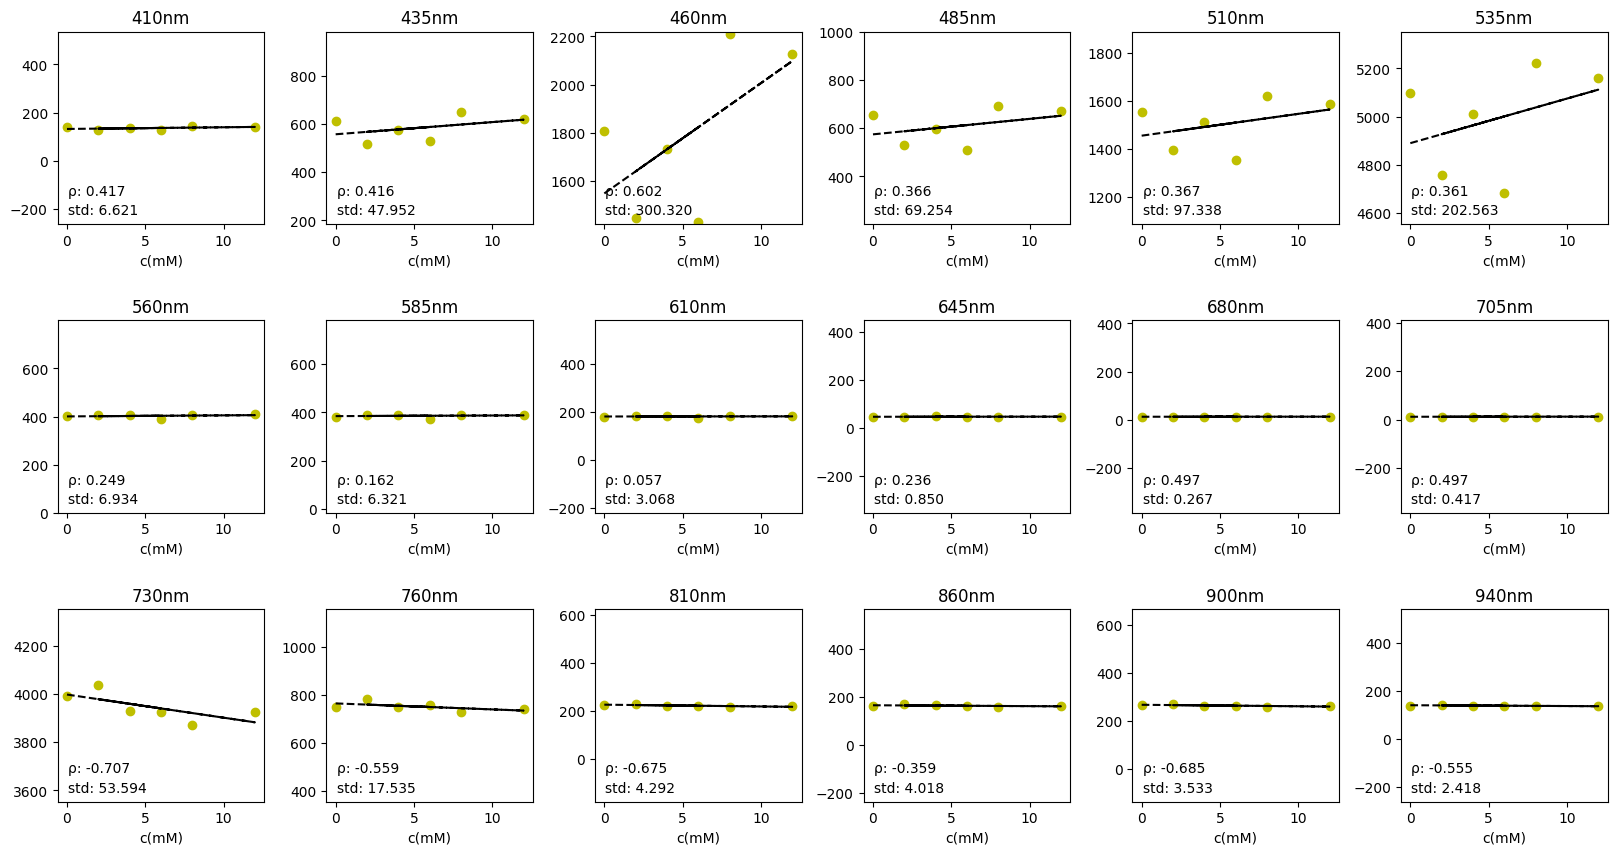

## Yellow transparent sheet

### LED on: IR

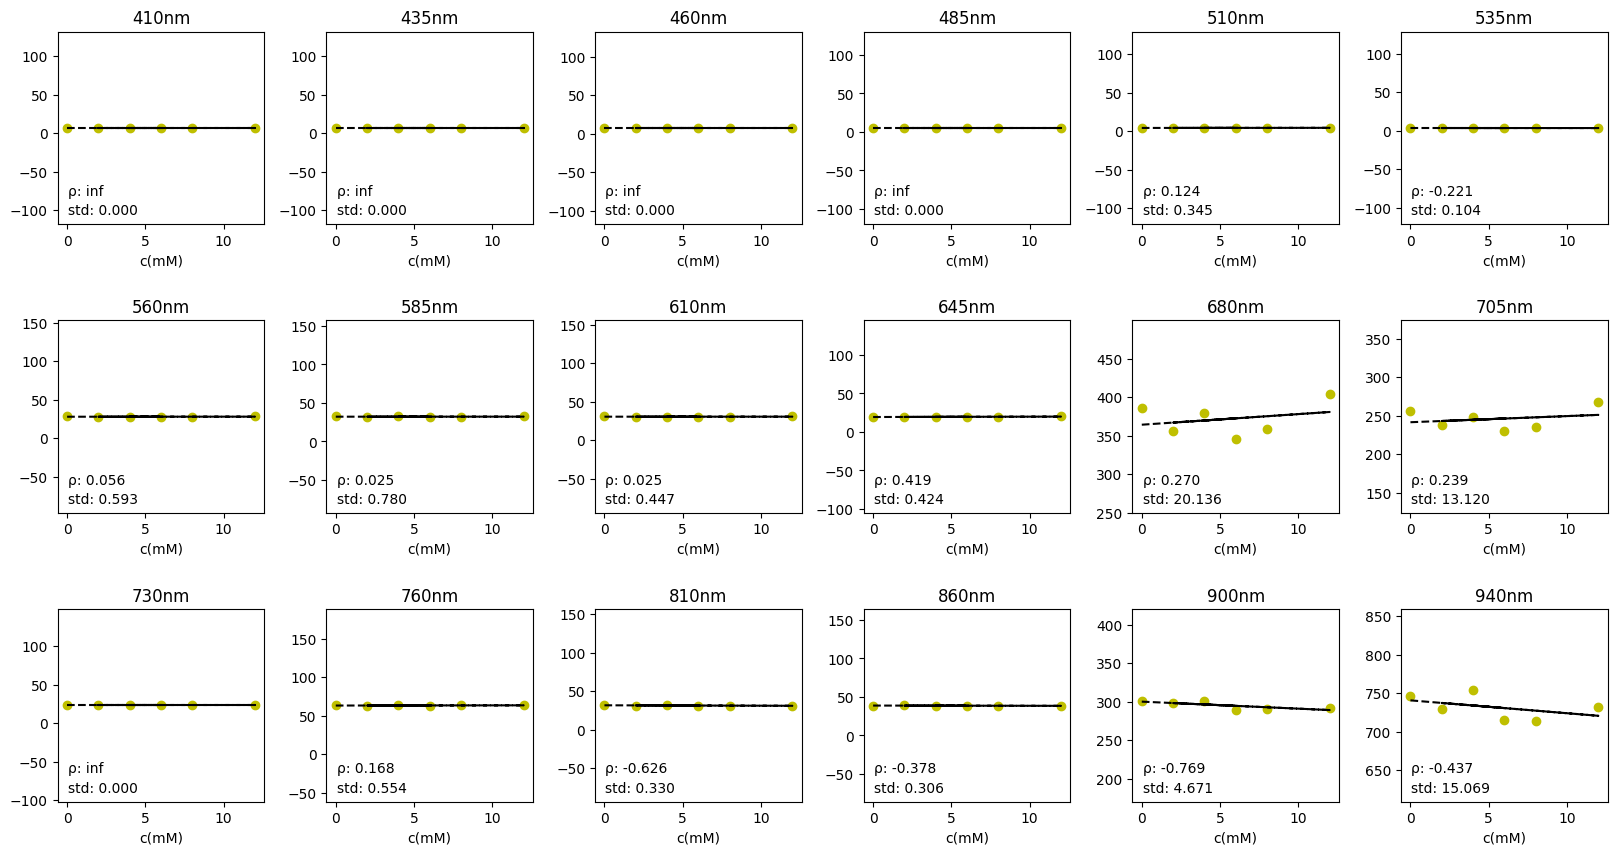

## Blue semi-transparent sheet

### LED on: UV

/Users/denisbalogh/Desktop/Skola/Bakalarka/glucose-tracker/env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:331: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


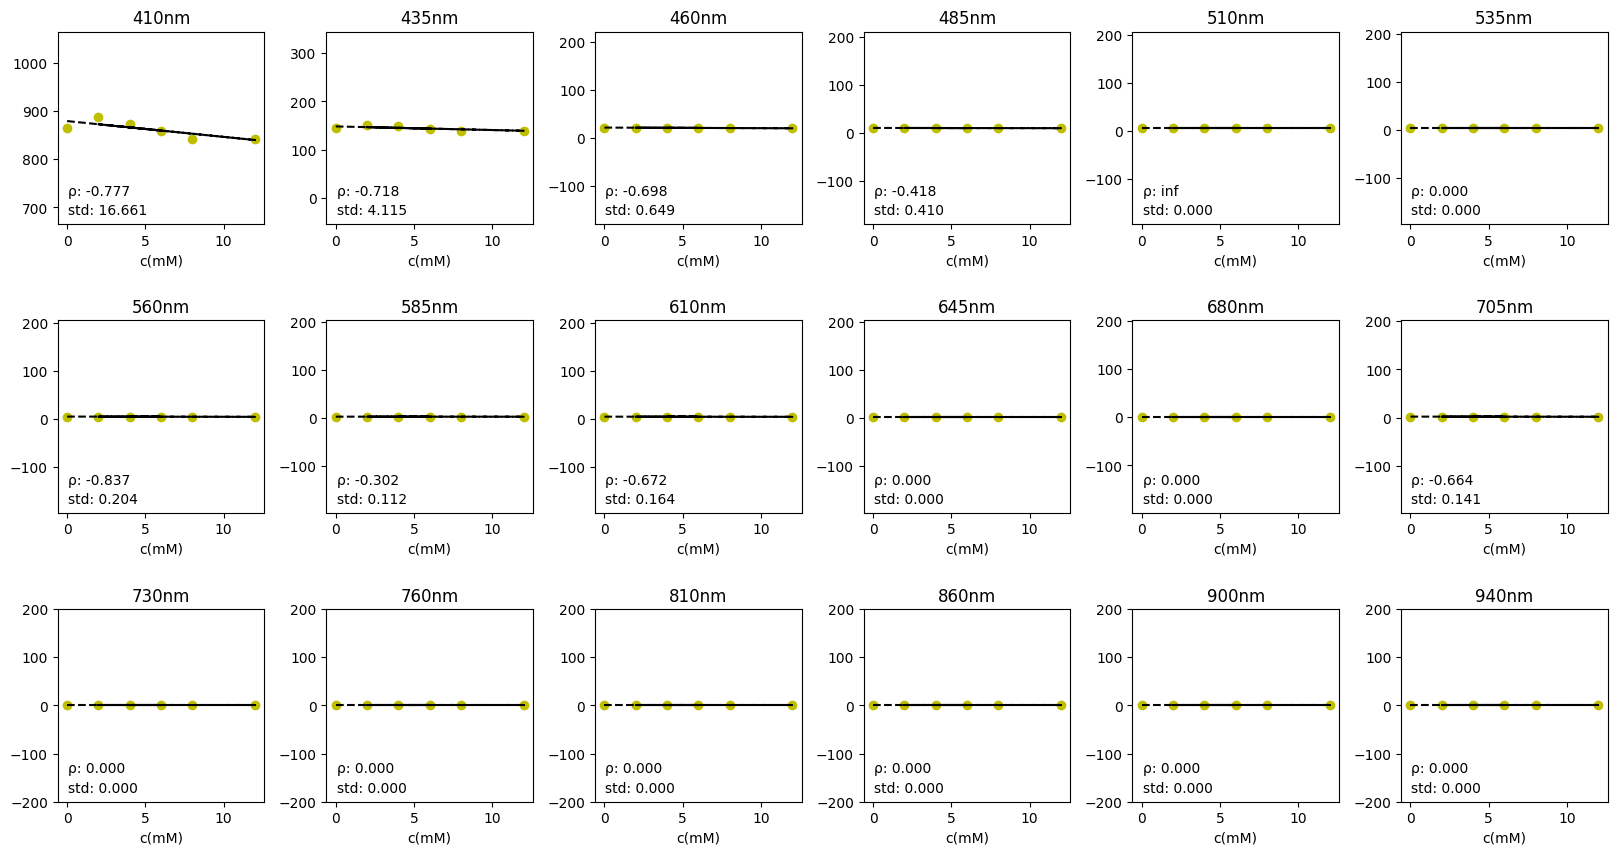

## Blue semi-transparent sheet

### LED on: VIS

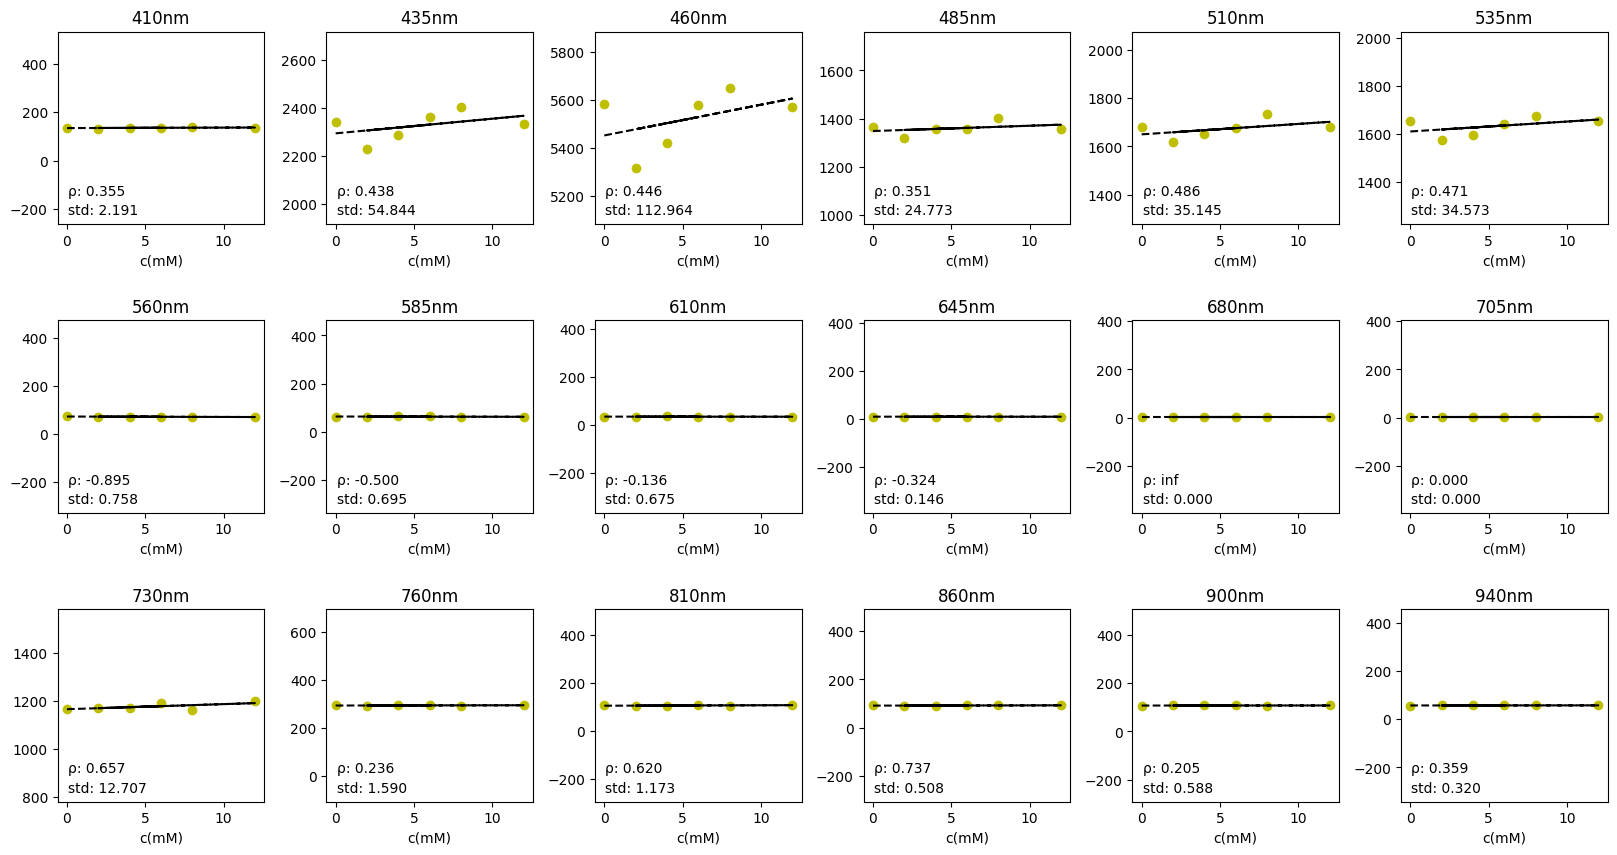

## Blue semi-transparent sheet

### LED on: IR

/Users/denisbalogh/Desktop/Skola/Bakalarka/glucose-tracker/env/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:331: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


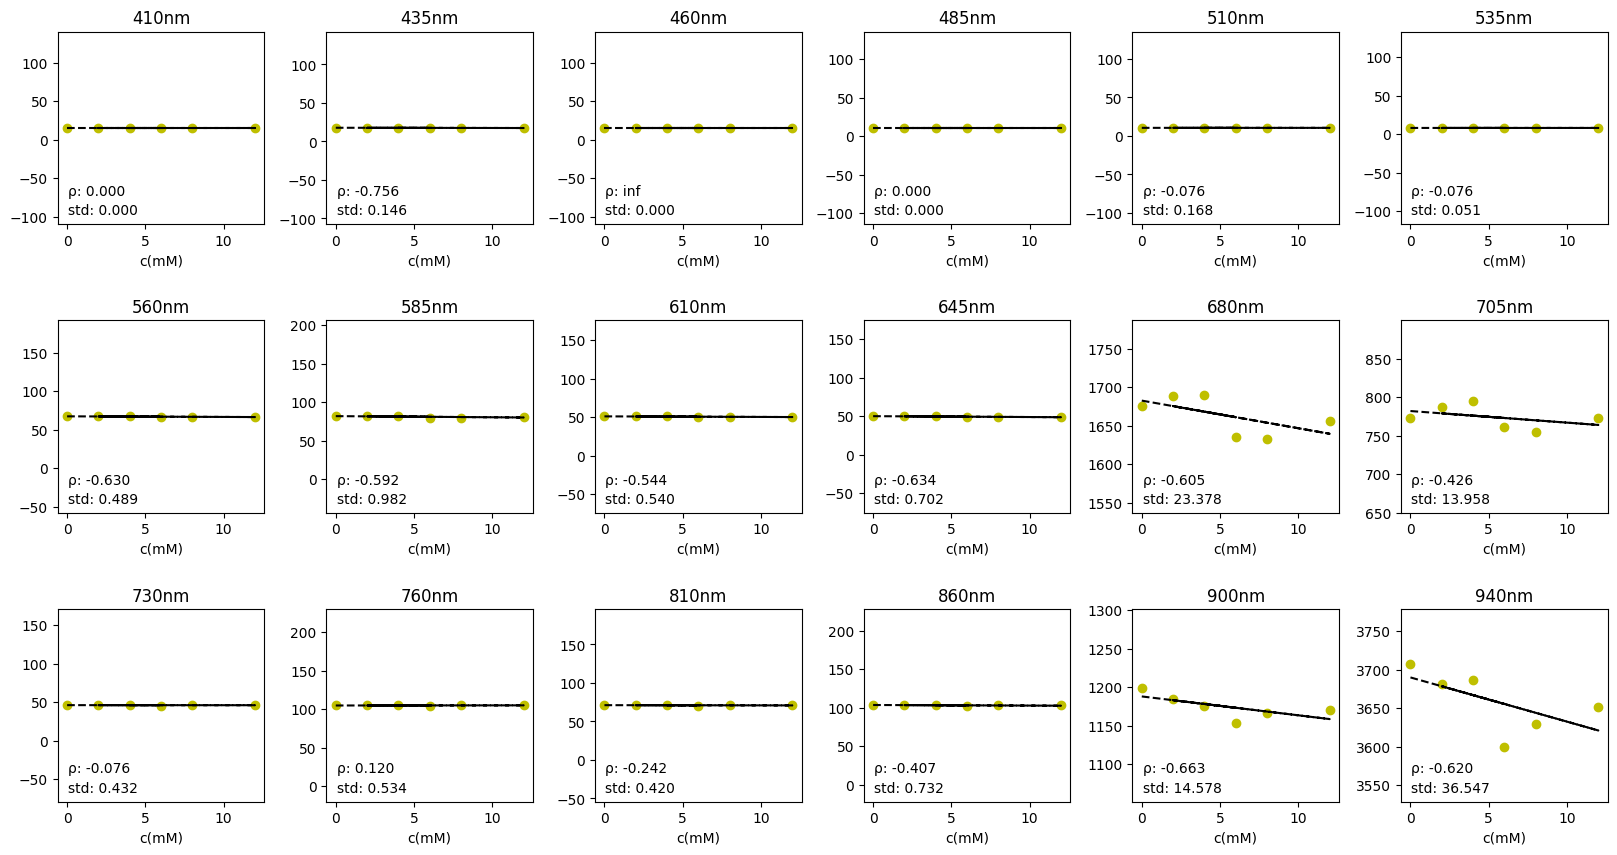

## Black seemingly not transparent sheet

### LED on: UV

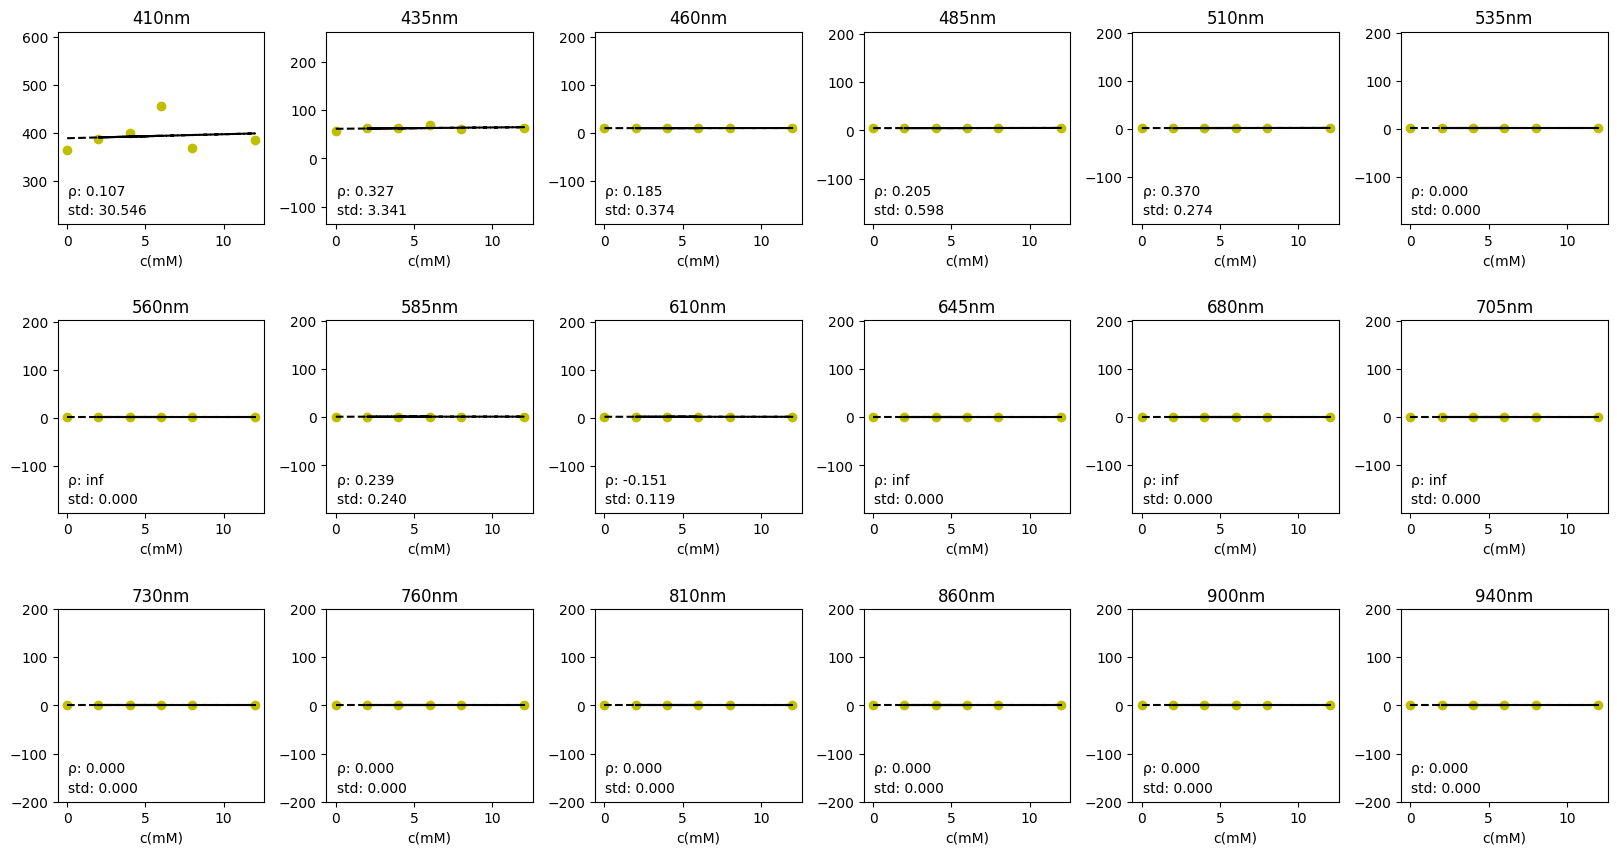

## Black seemingly not transparent sheet

### LED on: VIS

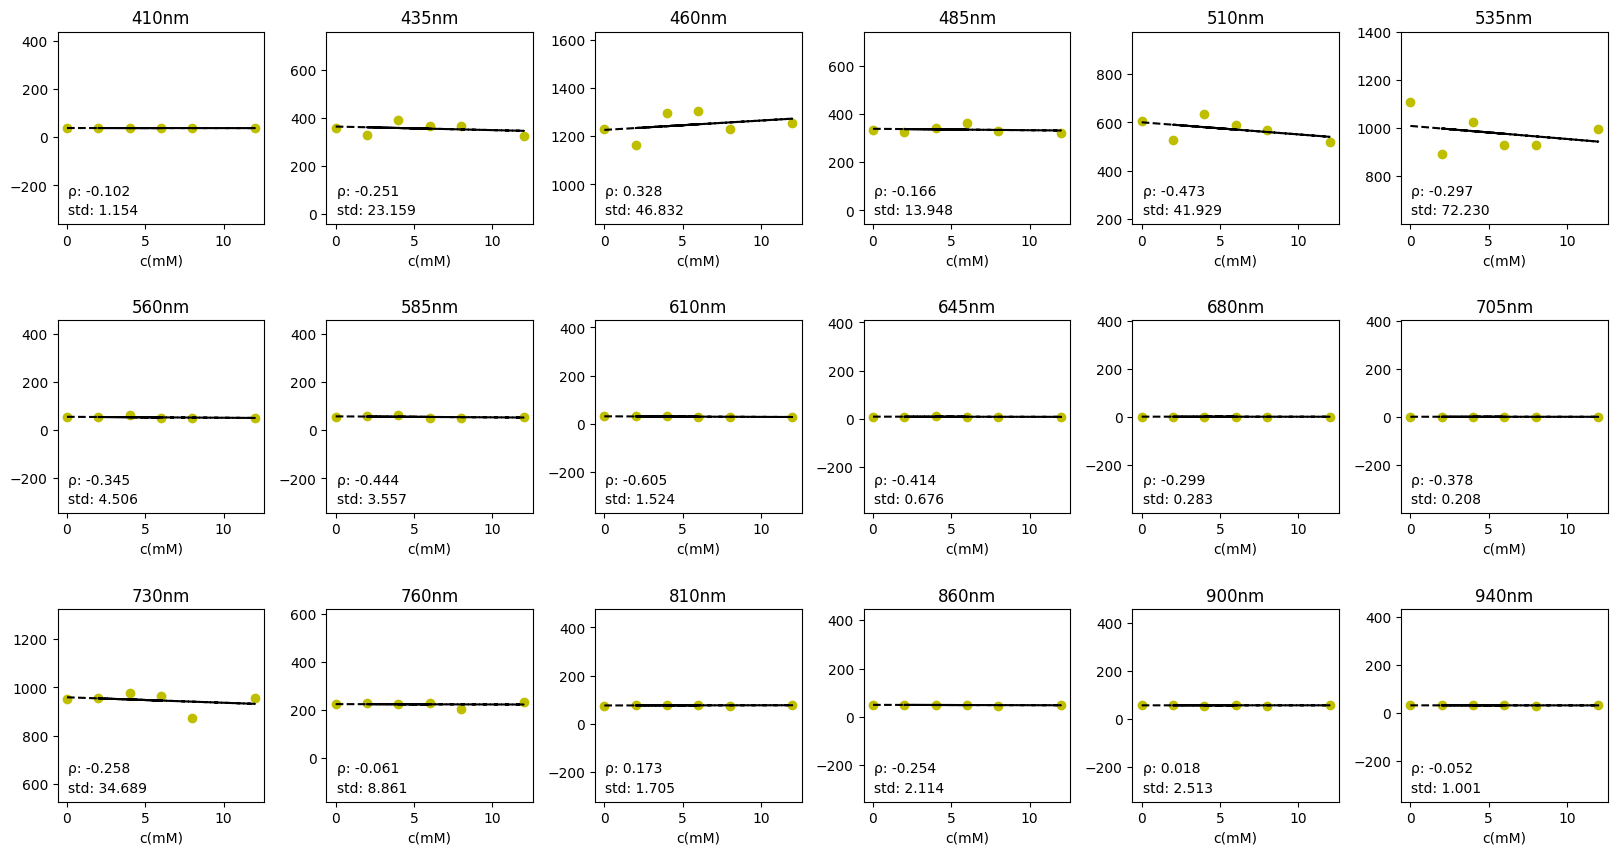

## Black seemingly not transparent sheet

### LED on: IR

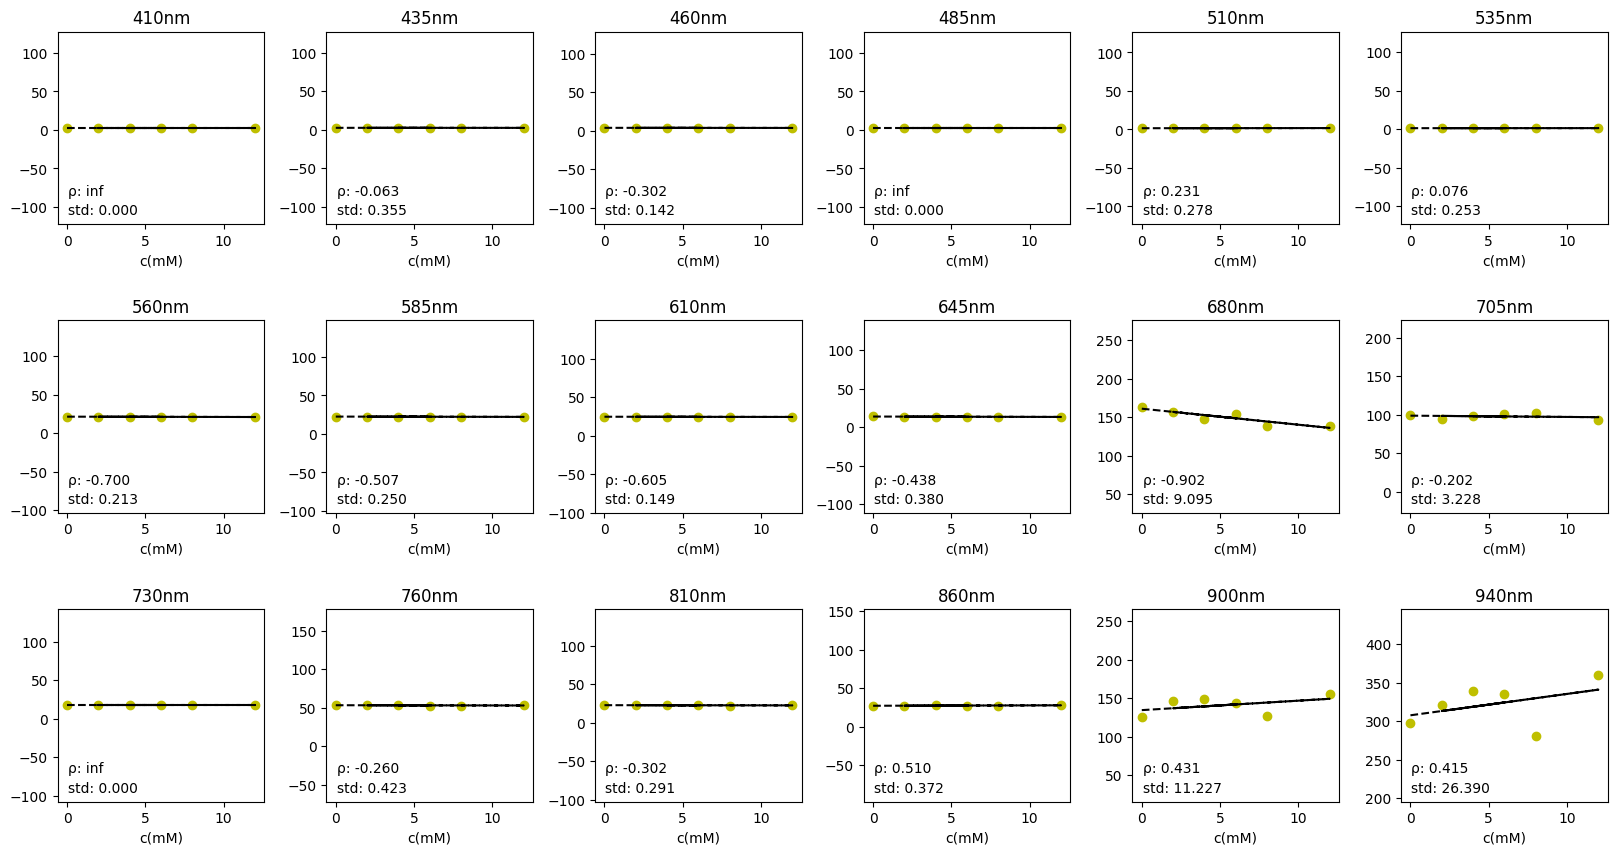

In [27]:
for cover in covers:
    for type in types:
        
        display(Markdown(f"## {cover['name']}"))
        display(Markdown(f"### LED on: {type['name']}"))
        
        plt.figure(figsize=(20, 10))
        plt.subplots_adjust(hspace=0.5, wspace=0.3)
        
        filepath = base + cover["path"] + type["path"]
        files = os.listdir(filepath)
        
        linreg = [[[], []] for _ in range(len(channels))]
        
        maxes = mins = None
        
        for file in files:
            data = np.loadtxt(filepath + file, delimiter="|").mean(axis=0)
            maxes = data if maxes is None else np.maximum(maxes, data)
            mins = data if mins is None else np.minimum(mins, data)
        
        for file in files:
            concentration = int(file.split("mM_")[0])
            data = np.loadtxt(filepath + file, delimiter="|").mean(axis=0)
            for ix, channel in enumerate(channels):
                plt.subplot(3, 6, ix + 1)
                plt.title(channel)
                plt.xlabel("c(mM)")
                
                mean = maxes[ix] - (maxes[ix] - mins[ix]) / 2
                plt.ylim(mean - limits[type["name"]]/2, mean + limits[type["name"]]/2)
                
                plt.plot(concentration, data[ix], 'yo')
                linreg[ix][0].append(concentration)
                linreg[ix][1].append(data[ix])
                
        for ix in range(len(channels)):
            x = linreg[ix][0]
            y = linreg[ix][1]
            coef = np.polyfit(x, y, 1)
            poly1d_fn = np.poly1d(coef) 
            plt.subplot(3, 6, ix + 1)
            plt.plot(x, poly1d_fn(x), '--k')
            
        for ix in range(len(channels)):
            x = np.array(linreg[ix][0])
            y = np.array(linreg[ix][1])
            r = r_regression(y.reshape(-1, 1), x)
            ax = plt.subplot(3, 6, ix + 1)
            plt.text(0.05, 0.15, f'ρ: {r.item():.3f}', transform=ax.transAxes)
            plt.text(0.05, 0.05, f'std: {y.std():.3f}', transform=ax.transAxes)
            
            
        plt.savefig(f'screens_subplots/{cover["name"]}-{type["name"]}.png', bbox_inches='tight', pad_inches=0.1)
                
        plt.show()
    

In [15]:

for cover in covers:
    for type in types:
        
        filepath = base + cover["path"] + type["path"]
        files = os.listdir(filepath)
        
        linreg = [[[], []] for _ in range(len(channels))]
        
        maxes = mins = None
        
        for file in files:
            data = np.loadtxt(filepath + file, delimiter="|").mean(axis=0)
            maxes = data if maxes is None else np.maximum(maxes, data)
            mins = data if mins is None else np.minimum(mins, data)
            
        for file in files:
            concentration = int(file.split("mM_")[0])
            data = np.loadtxt(filepath + file, delimiter="|").mean(axis=0)
            
            for ix in range(len(channels)):
                linreg[ix][0].append(concentration)
                linreg[ix][1].append(data[ix])
        
        for ix, channel in enumerate(channels):
            
            plt.figure(figsize=(5, 5))
            
            plt.title(channel)
            plt.xlabel("c(mM)")
            
            mean = maxes[ix] - (maxes[ix] - mins[ix]) / 2
            plt.ylim(mean - limits[type["name"]]/2, mean + limits[type["name"]]/2)
            
            for file in files:
                
                concentration = int(file.split("mM_")[0])
                data = np.loadtxt(filepath + file, delimiter="|").mean(axis=0)
                
                plt.plot(concentration, data[ix], 'yo')
                
                x = linreg[ix][0]
                y = linreg[ix][1]
                
                coef = np.polyfit(x, y, 1)
                poly1d_fn = np.poly1d(coef) 

                plt.plot(x, poly1d_fn(x), '--k')
                    
            plt.savefig(f'screens/{cover["name"]}-{type["name"]}-{channel}.png')
            
            # plt.show()
            
            plt.close()
            
            break
        break
    break